In [1]:
# Import libraries
import math
import matplotlib
import numpy as np
import heapq
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, LineString, Point, MultiLineString, MultiPoint
from shapely.ops import nearest_points

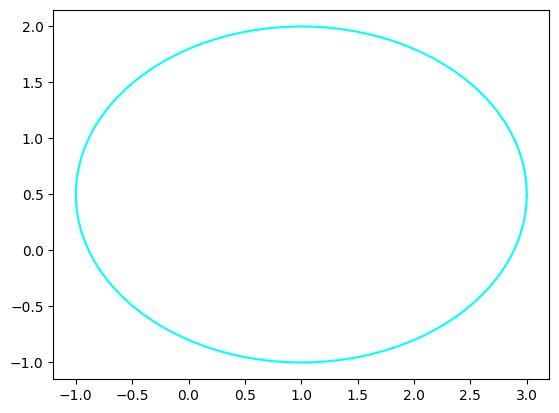

In [2]:
def plot_polygon(polygon):
    x, y = polygon.exterior.xy
    plt.plot(x, y, color='cyan')
    plt.show()
    
def plot_linestring(ls: LineString) -> None:
    x, y = ls.xy
    fig, ax = plt.subplots()
    ax.plot(x, y, color='lime')
    plt.show()
    
def gcd(a, b):
    while b != 0:
        r = a % b
        a = b
        b = r
    return a
    
u=1.     #x-position of the center
v=0.5    #y-position of the center
a=2.     #radius on the x-axis
b=1.5    #radius on the y-axis
t = np.linspace(0, 2 * math.pi, 100)

vertices = []
for i in range(len(t)):
    vertices.append((u + a * np.cos(t[i]) , v + b * np.sin(t[i])))
example_polygon = Polygon(vertices)
plot_polygon(example_polygon)

In [3]:
def get_min_max_x_y(polygon, resolution: int):
    # Get the minimum and maximum x and y values
    min_x, min_y = float('inf'), float('inf')
    max_x, max_y = float('-inf'), float('-inf')
    for x, y in polygon.exterior.coords:
        if x < min_x:
            min_x = x
        if y < min_y:
            min_y = y
        if x > max_x:
            max_x = x
        if y > max_y:
            max_y = y
    return min_x, min_y, max_x, max_y


def combine_edges(in_vertical, out_vertical, resolution):
    zigzag_border = []
    for i in range(resolution):
        zigzag_border.append(in_vertical[i][0])
        zigzag_border.append(in_vertical[i][1])   
    
    # Right side
    out_vertical.reverse()
    for i in range(resolution):
        zigzag_border.append(out_vertical[i][1])
        zigzag_border.append(out_vertical[i][0])
    zigzag_border.append(in_vertical[0][0])
    return LineString(zigzag_border)


def zigzag_border(polygon, resolution: int):
    # Set up
    # resolution: corresponds to the number of segments
    min_x, min_y, max_x, max_y = get_min_max_x_y(polygon, resolution)
    
    dx = abs(max_x - min_x) / resolution
    dy = abs(max_y - min_y) / resolution
        
    # ALGORITHM
    in_vertical = []
    out_vertical = []
    for i in range(resolution):
        # Horizontal check
        horizontal_in_check = False
        horizontal_out_check = False
        check_indx = -1
        check_in_h_line = None
        check_out_h_line = None
        for j in range(resolution):
            polygon_cell = Polygon([
                                     ((min_x + j * dx), (max_y - i * dy)),
                                     ((min_x + (j + 1) * dx), (max_y - i * dy)),
                                     ((min_x + (j + 1) * dx), (max_y - (i + 1) * dy)),
                                     ((min_x + j * dx), (max_y - (i + 1) * dy)),
                                    ])
            if polygon.intersects(polygon_cell):
                check_indx = j
                if not horizontal_in_check:
                    horizontal_in_check = True
                    check_in_h_line = (((min_x + j * dx), (max_y - i * dy)), 
                                       ((min_x + j * dx), (max_y - (i + 1) * dy)))
        if horizontal_in_check == True and horizontal_out_check == False:
            horizontal_out_check = True
            check_out_h_line = (((min_x + (check_indx + 1) * dx), (max_y - i * dy)), 
                                ((min_x + (check_indx + 1) * dx), (max_y - (i + 1) * dy)))
        if check_in_h_line != None and check_out_h_line != None:
            in_vertical.append(check_in_h_line)
            out_vertical.append(check_out_h_line)
            
    
    # Combine edges / lines
    zigzagged_border = combine_edges(in_vertical, out_vertical, resolution)
    return zigzagged_border

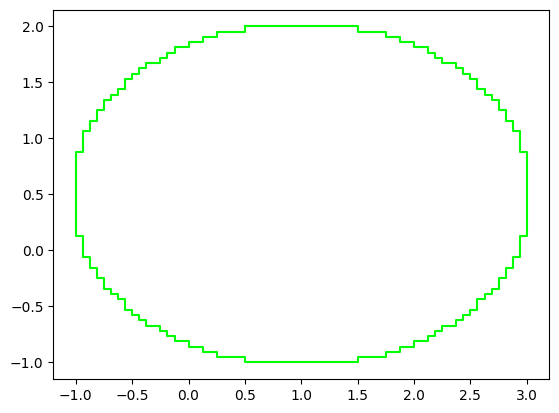

In [4]:
zigzagged_border = zigzag_border(example_polygon, 64)
plot_linestring(zigzagged_border)
zigzagged_polygon = Polygon(zigzagged_border)

In [5]:
def print_polygon_sides(polygon):
    # Get the exterior boundary coordinates
    exterior_coords = list(polygon.exterior.coords)

    # Calculate and print each side (edge) of the polygon
    print("Sides of the polygon:")
    for i in range(len(exterior_coords) - 1):
        side = LineString([exterior_coords[i], exterior_coords[i + 1]])
        print(f"Side {i + 1}:")
        print(side)

    # Close the polygon by printing the last side connecting back to the first point
    final_side = LineString([exterior_coords[-1], exterior_coords[0]])
    print(f"Side {len(exterior_coords)}:")
    print(final_side)

# Print sides of the polygon
# print_polygon_sides(zigzagged_polygon)